<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/HW2_20183127%20%EC%84%B1%EB%AF%BC%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 2
Answer folloing questions 



### Below is one of the example code for binary-class classification problem on IMDB dataset

In [31]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [32]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [34]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

**Original model**

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [36]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5335 - accuracy: 0.7755 - val_loss: 0.4027 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3205 - accuracy: 0.9016 - val_loss: 0.3278 - val_accuracy: 0.8749
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2306 - accuracy: 0.9275 - val_loss: 0.2832 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1805 - accuracy: 0.9403 - val_loss: 0.2776 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1415 - accuracy: 0.9557 - val_loss: 0.2913 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1171 - accuracy: 0.9633 - val_loss: 0.2999 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0969 - accuracy: 0.9699 - val_loss: 0.3121 - val_accuracy: 0.8840
Epoch 8/20
30

### Q1 Binary classification is multi-class classification with two classes so we can modify our model as below:

In [39]:
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(2, activation="softmax")
])

### Complete the codes for compile and model fitting. 

In [40]:
#model2.compile()

model2.compile(optimizer = "rmsprop",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"])


#model2.fit()

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.4993 - accuracy: 0.7814 - val_loss: 0.3676 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2826 - accuracy: 0.9057 - val_loss: 0.3637 - val_accuracy: 0.8478
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2100 - accuracy: 0.9304 - val_loss: 0.2792 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1635 - accuracy: 0.9475 - val_loss: 0.2767 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1344 - accuracy: 0.9573 - val_loss: 0.2867 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1068 - accuracy: 0.9661 - val_loss: 0.3039 - val_accuracy: 0.8846
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0896 - accuracy: 0.9722 - val_loss: 0.3354 - val_accuracy: 0.8789
Epoch 8/20
30

### Q2 Below is visualization of the validation loss. We can see overfitting after 5 epochs.  

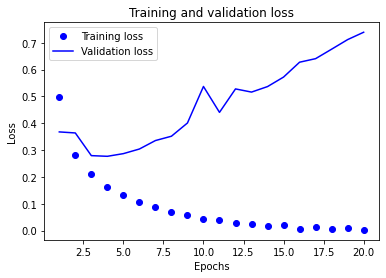

In [41]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Add dropout layers and visualize the validation loss of your new model.

In [42]:
## Add dropout layers 

model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])



## retrain our new model

model2_dr.compile(optimizer = "rmsprop",
                  loss = "sparse_categorical_crossentropy",
                  metrics = ["accuracy"])

history_dropout = model2_dr.fit(partial_x_train,
                                partial_y_train,
                                epochs = 20,
                                batch_size = 512, 
                                validation_data = (x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6344 - accuracy: 0.6405 - val_loss: 0.5203 - val_accuracy: 0.8170
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5187 - accuracy: 0.7652 - val_loss: 0.4148 - val_accuracy: 0.8709
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4364 - accuracy: 0.8249 - val_loss: 0.3489 - val_accuracy: 0.8784
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3757 - accuracy: 0.8577 - val_loss: 0.3094 - val_accuracy: 0.8820
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3219 - accuracy: 0.8835 - val_loss: 0.2939 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2826 - accuracy: 0.9049 - val_loss: 0.2817 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2470 - accuracy: 0.9144 - val_loss: 0.2836 - val_accuracy: 0.8867
Epoch 8/20
30

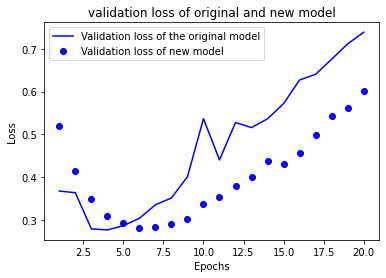

In [43]:
## Visualize the validation loss of our new model

import matplotlib.pyplot as plt

history_dict = history.history
history_dict_dr = history_dropout.history

val_loss_values = history_dict["val_loss"]
val_loss_values_dr = history_dict_dr["val_loss"]
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, val_loss_values, "b", label="Validation loss of the original model")
plt.plot(epochs, val_loss_values_dr, "bo", label="Validation loss of new model")
plt.title("validation loss of original and new model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Overfitting in new model is observed after 7 epochs, while the original model was overfitted after 5 epochs. Our new model seems to have better performance than the original model.

### Q3 Add l1 regularization on the second dense layer from the original model below. 

In [44]:
## Add l1 regularization on the second dense layers 

from tensorflow.keras import regularizers


model2_dr = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu", 
                 kernel_regularizer = regularizers.l1(0.002)),    ### add l1 regularization here
    layers.Dense(2, activation="softmax")
])


### Finish the training and compare the dropout model(model from Q2) and l1 regularization model after visualizing their validation losses.

In [45]:
# finish the training

model2.compile(optimizer = "rmsprop",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"])

history_l1_reg = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.7797 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.8021 - val_accuracy: 0.8661
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.8518 - val_accuracy: 0.8653
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 9.2911e-04 - accuracy: 0.9999 - val_loss: 0.8770 - val_accuracy: 0.8650
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 7.6187e-04 - accuracy: 0.9999 - val_loss: 0.9340 - val_accuracy: 0.8625
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.9740 - val_accuracy: 0.8642
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 4.2722e-04 - accuracy: 0.9999 - val_loss: 0.9925 - val_accuracy: 0.8633
E

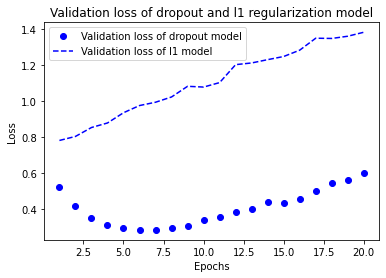

In [46]:
## Visualization of dropout and l1 regularization model

import matplotlib.pyplot as plt

history_dict_dr = history_dropout.history
history_dict_l1 = history_l1_reg.history

val_loss_values_dr = history_dict_dr["val_loss"]
val_loss_values_l1 = history_dict_l1["val_loss"]
epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, val_loss_values_dr, "bo", label="Validation loss of dropout model")
plt.plot(epochs, val_loss_values_l1, "b--", label="Validation loss of l1 model")
plt.title("Validation loss of dropout and l1 regularization model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plot above is the validation loss of dropout and l1 regularization model. 

- **L1 regularization model** seems to be overfitted since the validation loss increases drastically. 
- On the other hand, overfitting in **dropout model** starts later(after 7 epochs) than L1 regularized model(after 2 epochs).

We can say that dropout model performs better than L1 regularized model.